<a href="https://colab.research.google.com/github/Ooopajovem/Predicao-o-do-Desempenho-Escolar-Baseado-em-Machine-Learning/blob/main/Av1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avaliação 1°**

## Avaliação do abandono ou sucesso acadêmico dos alunos
### Base
* https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR
from sklearn.datasets import load_iris
from sklearn.metrics import  accuracy_score
#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go

!pip install catboost
from catboost import CatBoostClassifier
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [2]:
link = '/content/drive/MyDrive/Av1/StudentsPerformance.csv'
baseD = pd.read_csv(link)#,"sep=";")

In [3]:
data = pd.DataFrame(data=baseD)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
pontuacao = data[["math score","reading score","writing score"]]
pontuacao.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


<Axes: >

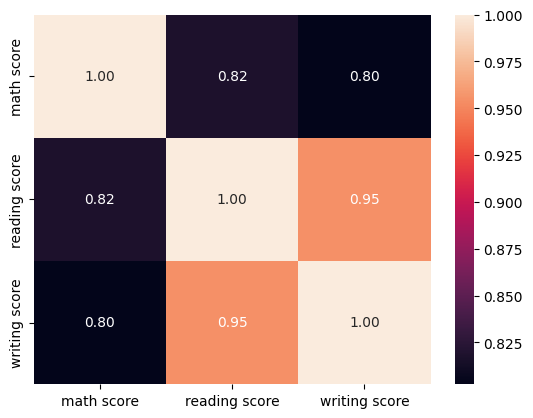

In [7]:
correlacao = pontuacao.corr()
sns.heatmap(correlacao, annot=True, fmt=".2f")

<Axes: xlabel='writing score', ylabel='reading score'>

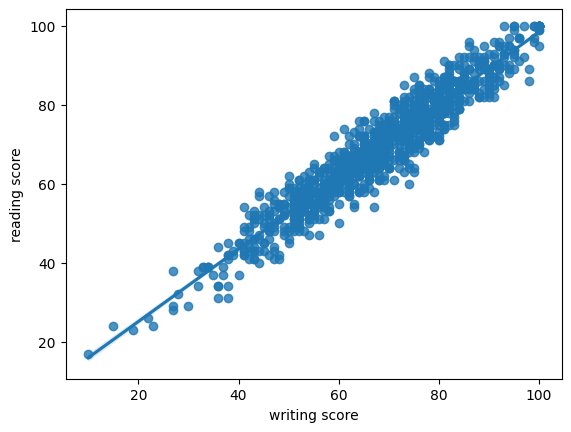

In [8]:
y = data['reading score']
x = data['writing score']
sns.regplot(x=x, y=y)

In [9]:
data['mediaNotas'] = pontuacao.mean(axis=1)
data = data.drop(["math score",'reading score',"writing score"], axis=1)
data.head()

##data['mediaNotas'] = pontuacao.round(2).mean(axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mediaNotas
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


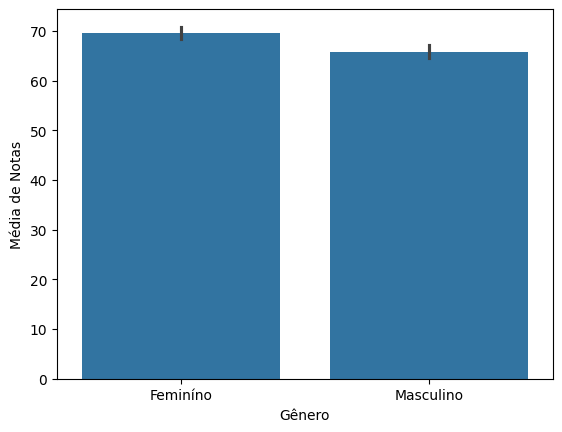

In [10]:
G = sns.barplot(data = data, x='gender', y='mediaNotas')
plt.xlabel('Gênero')
plt.xticks([0,1], ['Feminíno','Masculino'])
plt.ylabel('Média de Notas')
plt.show()

In [11]:
dataRace = data [['race/ethnicity','mediaNotas']].groupby('race/ethnicity', as_index=False).mean().sort_values(by='mediaNotas', ascending=False, ignore_index=True)
#dataRace = data[['race/ethnicity', 'mediaNotas']].groupby('race/ethnicity', as_index=False).mean().sort_values(by='media', ascending= False, ignore_index= True)
dataRace

,race/ethnicity,mediaNotas
0,group E,72.752381
1,group D,69.179389
2,group C,67.131661
3,group B,65.468421
4,group A,62.992509


In [12]:
dataRace.rename(columns = {'race/ethnicity':'Etnia'}, inplace = True)
dataRace

,Etnia,mediaNotas
0,group E,72.752381
1,group D,69.179389
2,group C,67.131661
3,group B,65.468421
4,group A,62.992509


In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mediaNotas
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [14]:
situacao=[]

In [15]:
for i in data.mediaNotas:
  if i < 60:
    #print('Reprovado')
    situacao.append(0)
  else:
    #print('Aprovado')
    situacao.append(1)

In [16]:
data['Situacao'] = situacao

In [17]:
#data

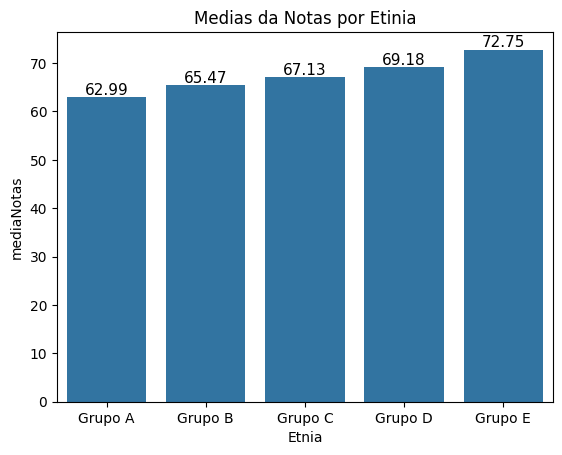

In [18]:
raceEt = sns.barplot(data=dataRace, x='Etnia', y='mediaNotas', order=dataRace.sort_values('mediaNotas').Etnia)
plt.title('Medias da Notas por Etinia')
plt.xticks([0,1,2,3,4], ['Grupo A','Grupo B','Grupo C','Grupo D','Grupo E'])
#['Grupo A - Branco - Britânico','Grupo B - Branco - Irlandês','Grupo C - Branco - Qualquer outro fundo branco','Grupo D - Misto - Branco e Negro Caribenho','Grupo E - Misto - Branco e Negro Africano'
raceEt = plt.gca()
for p in raceEt.patches:
    raceEt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height())
    , ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

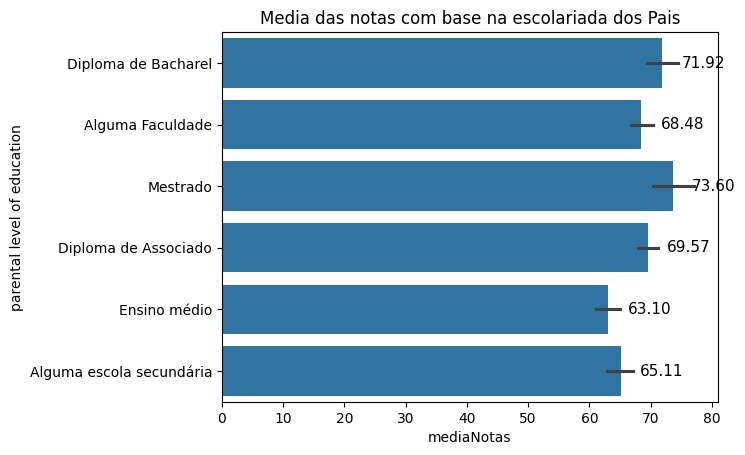

In [19]:
paisEdu = sns.barplot(data =  data, y='parental level of education', x='mediaNotas', orient='h')
plt.title("Media das notas com base na escolariada dos Pais")
plt.yticks([0,1,2,3,4,5], ['Diploma de Bacharel','Alguma Faculdade','Mestrado','Diploma de Associado','Ensino médio','Alguma escola secundária'])
paisEdu = plt.gca()
for p in paisEdu.patches:
    paisEdu.annotate(f'{p.get_width():.2f}', (p.get_x() + (2+p.get_width()), p.get_y() + p.get_height()/ 2.), ha='left', va='center', fontsize=11, color='black', xytext=(5, 0), textcoords='offset points')

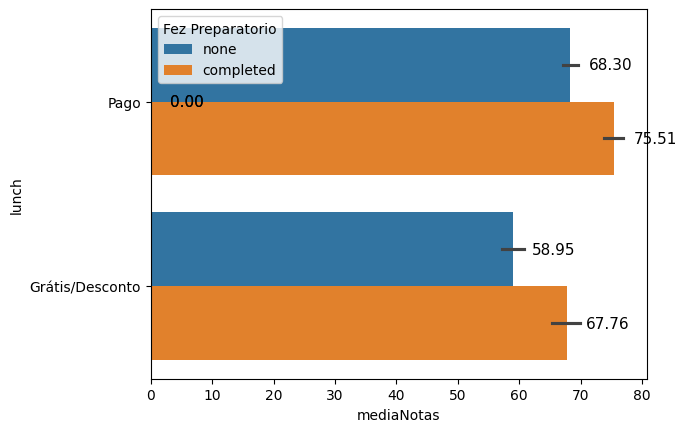

In [20]:
alm =sns.barplot(data =  data, x='mediaNotas',y='lunch', hue='test preparation course')
plt.yticks([0,1],['Pago','Grátis/Desconto'])
alm.legend(title='Fez Preparatorio')#,labels=['Não','Sim'])
#custom_labels={'none':'Não','completed':'Sim'}
alm = plt.gca()
#plt.show()
for p in alm.patches:
    alm.annotate(f'{p.get_width():.2f}', (p.get_x() + (2+p.get_width()), p.get_y() + p.get_height()/ 2.), ha='left', va='center', fontsize=11, color='black', xytext=(5, 0), textcoords='offset points')

Text(0.5, 1.0, 'Distribuição da média')

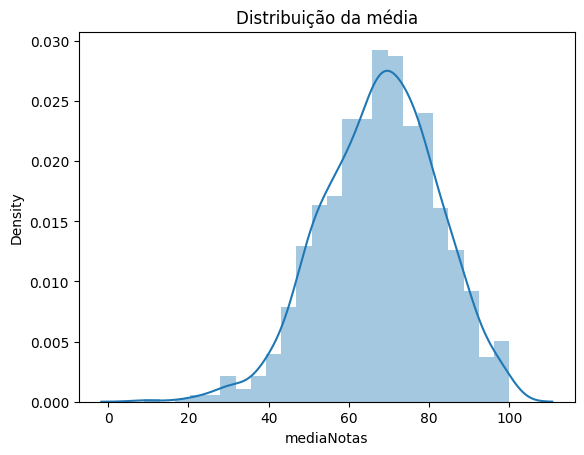

In [21]:
sns.distplot(data['mediaNotas'],label = 'Skewness: {:.2f}'.format(data['mediaNotas'].skew()))
plt.title('Distribuição da média')


In [22]:
gene01 = OneHotEncoder(sparse=False)
gene01.fit_transform(data[['gender']])[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [23]:
data.gender.head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [24]:
list(data['parental level of education'].unique())

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [25]:
paisEdu = ["bachelor's degree",'some college',"master's degree",
           "associate's degree",'high school','some high school']

In [26]:
pEdu = OrdinalEncoder(categories = [paisEdu])
pEdu.fit_transform(data[['parental level of education']])[:5]

array([[0.],
       [1.],
       [2.],
       [3.],
       [1.]])

In [27]:
data['parental level of education'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: parental level of education, dtype: object

In [28]:
x = data.drop(['mediaNotas','Situacao'],axis=1)
y = data['Situacao']

In [29]:
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mediaNotas,Situacao
0,female,group B,bachelor's degree,standard,none,72.666667,1


In [30]:
columaTransf = make_column_transformer ((gene01, ['gender', 'race/ethnicity',
                                                 'lunch', 'test preparation course']),
                                          (pEdu, ['parental level of education']))

In [31]:
columaTransf.fit_transform(x)[:5]

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 2.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.]])

### Treinamento

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)#5

In [33]:
print(f'X_train: numero de linhas ecolunas {x_train.shape}')
print(f'X_test: numero de linhas ecolunas {x_test.shape}')
print(f'Y_train: numero de linhas ecolunas {y_train.shape}')
print(f'Y_test: numero de linhas ecolunas {y_test.shape}')

X_train: numero de linhas ecolunas (800, 5)
X_test: numero de linhas ecolunas (200, 5)
Y_train: numero de linhas ecolunas (800,)
Y_test: numero de linhas ecolunas (200,)


In [34]:
dtResultado = pd.DataFrame()

In [35]:
dtResultado['Apro/Repro'] = y_test.values

In [36]:
dtResultado.head()

,Apro/Repro
0,1
1,1
2,1
3,0
4,1


### CatBoost

In [37]:
testCatB = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)

In [38]:
testCatBPipe = make_pipeline(columaTransf,testCatB)

In [39]:
testCatBPipe.fit(x_train,y_train)

0:	learn: 0.6720816	total: 46.4ms	remaining: 4.59s
1:	learn: 0.6534767	total: 47.6ms	remaining: 2.33s
2:	learn: 0.6361196	total: 48.2ms	remaining: 1.56s
3:	learn: 0.6227985	total: 48.7ms	remaining: 1.17s
4:	learn: 0.6102583	total: 49.2ms	remaining: 935ms
5:	learn: 0.5990018	total: 49.7ms	remaining: 779ms
6:	learn: 0.5893005	total: 50.3ms	remaining: 668ms
7:	learn: 0.5806889	total: 50.8ms	remaining: 585ms
8:	learn: 0.5734430	total: 52.6ms	remaining: 532ms
9:	learn: 0.5664766	total: 54.1ms	remaining: 487ms
10:	learn: 0.5602679	total: 54.5ms	remaining: 441ms
11:	learn: 0.5550668	total: 55.1ms	remaining: 404ms
12:	learn: 0.5498238	total: 55.7ms	remaining: 373ms
13:	learn: 0.5460593	total: 56.2ms	remaining: 345ms
14:	learn: 0.5426238	total: 56.7ms	remaining: 321ms
15:	learn: 0.5393936	total: 57.1ms	remaining: 300ms
16:	learn: 0.5357137	total: 57.7ms	remaining: 282ms
17:	learn: 0.5321067	total: 58.3ms	remaining: 266ms
18:	learn: 0.5292622	total: 58.9ms	remaining: 251ms
19:	learn: 0.5266891	t

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7b1f52126410>)])

In [40]:
pred5 = testCatBPipe.predict(x_test)

In [41]:
dtResultado['CatBoorstClas'] = testCatBPipe.predict(x_test)

In [42]:
dtResultado.head(6)

,Apro/Repro,CatBoorstClas
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1


In [43]:
rmse5 = (np.sqrt(mean_squared_error(y_test,pred5)))

In [44]:
print(f'CatBoost\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse5:.2f}')

CatBoost
Performace do modelo avaliado com dados de teste
RMSE é: 0.51


In [45]:
print(accuracy_score(y_test,pred5))
print(f"R^2 score: {testCatBPipe.score(x,y)}")

0.74
R^2 score: 0.773


In [46]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modeloe CatBoost')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['CatBoorstClas'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Regressão Logistica

In [47]:
model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)

In [48]:
modelpipe = make_pipeline(columaTransf,model)

In [49]:
modelpipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('logisticregression', LogisticRegression())])

In [50]:
pred6 = modelpipe.predict(x_test)

In [51]:
dtResultado['Reg. Logist'] = modelpipe.predict(x_test)

In [52]:
rmse6 = (np.sqrt(mean_squared_error(y_test,pred6)))

In [53]:
print(f'Regr. Logistica\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse6:.2f}')

Regr. Logistica
Performace do modelo avaliado com dados de teste
RMSE é: 0.52


In [54]:
print(accuracy_score(y_test,pred6))##, normalize=False))
print(f"R^2 score: {modelpipe.score(x,y)}")

0.725
R^2 score: 0.744


In [55]:
dtResultado

,Apro/Repro,CatBoorstClas,Reg. Logist
0,1,1,1
1,1,1,1
2,1,1,1
3,0,1,1
4,1,1,1
...,...,...,...
195,0,1,1
196,1,1,1
197,0,0,0
198,0,1,1


In [56]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modeloe Regr. Logistica')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['Reg. Logist'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Árvore de decisão fina

In [57]:
aF = DecisionTreeClassifier(max_depth=2)

In [58]:
afPipe = make_pipeline(columaTransf, aF)

In [59]:
afPipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2))])

In [60]:
pred7 = afPipe.predict(x_test)

In [61]:
dtResultado['Arv. D F'] = afPipe.predict(x_test)

In [62]:
rmse7 = (np.sqrt(mean_squared_error(y_test,pred7)))

In [63]:
print(f'Arv. D F\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse7:.2f}')

Arv. D F
Performace do modelo avaliado com dados de teste
RMSE é: 0.54


In [64]:
print(accuracy_score(y_test,pred7))##, normalize=False))
print(f"R^2 score: {afPipe.score(x,y)}")

0.71
R^2 score: 0.725


In [65]:
dtResultado['Arv. D F'] = afPipe.predict(x_test)

In [66]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo Árv. decisão Fina')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['Arv. D F'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Árvore de Decisão Grosseira

In [67]:
aD = DecisionTreeClassifier(max_depth=10)

In [68]:
aDPipe = make_pipeline(columaTransf, aD)

In [69]:
aDPipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10))])

In [70]:
pred8 = aDPipe.predict(x_test)

In [71]:
dtResultado['Arv. D G'] = aDPipe.predict(x_test)

In [72]:
rmse8 = (np.sqrt(mean_squared_error(y_test,pred8)))

In [73]:
print(f'Arv. D G\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse8:.2f}')

Arv. D G
Performace do modelo avaliado com dados de teste
RMSE é: 0.55


In [74]:
print(accuracy_score(y_test,pred8))##, normalize=False))
print(f"R^2 score: {aDPipe.score(x,y)}")

0.7
R^2 score: 0.775


In [75]:
dtResultado

,Apro/Repro,CatBoorstClas,Reg. Logist,Arv. D F,Arv. D G
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,0,1,1,1,1
4,1,1,1,0,0
...,...,...,...,...,...
195,0,1,1,1,1
196,1,1,1,1,1
197,0,0,0,0,0
198,0,1,1,1,1


In [76]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo Árv. decisão Grosseira')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['Arv. D G'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Árvore de Decisão Média

In [77]:
aDM = DecisionTreeClassifier(max_depth=5)

In [78]:
aDMPipe = make_pipeline(columaTransf, aDM)

In [79]:
aDMPipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

In [80]:
pred9 = aDMPipe.predict(x_test)

In [81]:
dtResultado['Arv. D M'] = aDMPipe.predict(x_test)

In [82]:
rmse9 = (np.sqrt(mean_squared_error(y_test,pred9)))

In [83]:
print(f'Arv. D G\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse9:.2f}')

Arv. D G
Performace do modelo avaliado com dados de teste
RMSE é: 0.50


In [84]:
print(accuracy_score(y_test,pred9))##, normalize=False))
print(f"R^2 score: {aDMPipe.score(x,y)}")

0.745
R^2 score: 0.757


In [85]:
dtResultado.head()

,Apro/Repro,CatBoorstClas,Reg. Logist,Arv. D F,Arv. D G,Arv. D M
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,1,1,1,1,1
4,1,1,1,0,0,0


In [86]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo Árv. decisão Média')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['Arv. D M'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### SVC

In [87]:
svc = SVC(kernel='linear', C=1.0)

In [88]:
svcPipe = make_pipeline(columaTransf,svc)

In [89]:
svcPipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('svc', SVC(kernel='linear'))])

In [90]:
pred10 = svcPipe.predict(x_test)

In [91]:
dtResultado['SVC'] = svcPipe.predict(x_test)

In [92]:
rmse10 = (np.sqrt(mean_squared_error(y_test,pred10)))

In [93]:
print(f'SVC linear\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse10:.2f}')

SVC linear
Performace do modelo avaliado com dados de teste
RMSE é: 0.53


In [94]:
print(accuracy_score(y_test,pred10))##, normalize=False))
print(f"R^2 score: {svcPipe.score(x,y)}")

0.715
R^2 score: 0.73


In [95]:
dtResultado.head()

,Apro/Repro,CatBoorstClas,Reg. Logist,Arv. D F,Arv. D G,Arv. D M,SVC
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1
4,1,1,1,0,0,0,0


In [96]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo Árv. decisão SVC L')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['SVC'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Cubic SVM supostamente é esse

In [97]:
#poly SVC supostamente é esse
svtCup = SVC(kernel='poly', degree=3, C=1)
svtCupPipe = make_pipeline(columaTransf,svtCup)
svtCupPipe.fit(x_train,y_train)
pre86 = svtCupPipe.predict(x_test)
rmse86 = (np.sqrt(mean_squared_error(y_test,pre86)))
dtResultado['SVM poly'] = svtCupPipe.predict(x_test)
print(f'SVC poly\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse86:.2f}')
print(accuracy_score(y_test, pre86))
print(f"R^2 score: {svtCupPipe.score(x,y)}")

SVC poly
Performace do modelo avaliado com dados de teste
RMSE é: 0.51
0.735
R^2 score: 0.743


In [98]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo SVM')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['SVM poly'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()

### Gaussian Naive Bayes

In [99]:
gNB = GaussianNB()

In [100]:
gNBPipe = make_pipeline(columaTransf,gNB)

In [101]:
gNBPipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[["bachelor's "
                                                                              'degree',
                                                                              'some '
                                                                              'college',
                                                                              "master's "
                                                                              'degree',
                                                                              "associate's "
                                                                              'degree',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'high '
                                                                              'school']]),
                                                  ['parental level of '
                                                   'education'])])),
                ('gaussiannb', GaussianNB())])

In [102]:
pred11 = gNBPipe.predict(x_test)

In [103]:
dtResultado['Gaussian Naive Bayes'] = gNBPipe.predict(x_test)

In [104]:
rmse11 = (np.sqrt(mean_squared_error(y_test,pred11)))

In [105]:
print(f'Gaus N B\nPerformace do modelo avaliado com dados de teste\nRMSE é: {rmse11:.2f}')

Gaus N B
Performace do modelo avaliado com dados de teste
RMSE é: 0.53


In [106]:
print(accuracy_score(y_test,pred11))##, normalize=False))
print(f"R^2 score: {gNBPipe.score(x,y)}")

0.715
R^2 score: 0.723


In [107]:
dtResultado.head()

,Apro/Repro,CatBoorstClas,Reg. Logist,Arv. D F,Arv. D G,Arv. D M,SVC,SVM poly,Gaussian Naive Bayes
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1,1,1
4,1,1,1,0,0,0,0,1,0


In [108]:
fig = go.Figure()
aprovados = dtResultado[dtResultado['Apro/Repro'] == 1]
fig.update_layout(title='Aprovado usado o modelo Gaussion Naive Bayes')
fig.add_trace(go.Scatter(x = aprovados.index,
                         y = aprovados['Apro/Repro'],
                         mode = 'lines+markers',
                         name = 'Valor real'))
fig.add_trace(go.Scatter(x = dtResultado.index,
                         y = dtResultado['Gaussian Naive Bayes'],
                         mode = 'lines+markers',
                         name = 'Cat Boos'))
fig.show()